# INFR 3700U Final_Project Fall 2024

AL Muqshith Shifan | 100862739
Arshia Mortizavi |

In this code, we are training a machine learning model to predict the likelihood of a college student securing a placement on campus based on various attributes, such as gender, academic stream, CGPA, internship experience, and others. The target variable, PlacedOrNot, indicates whether a student is placed (1) or not placed (0). The model's purpose is to find patterns in these features to classify future students as likely to be placed or not.

## IMPORTS AND FUNCTIONS USED

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import time  # For tracking time during computations
import numpy as np  # For numerical operations

# Preprocessing and data splitting
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding data
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and parameter tuning

# Machine learning models and evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report  # Metrics for model evaluation

# Neural network with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential  # For building sequential neural network models
from tensorflow.keras.layers import Dense, Dropout  # For adding dense and dropout layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # For model training callbacks


# Permutation importance for feature importance analysis
from sklearn.inspection import permutation_importance  # For evaluating feature importance

# Scikit-learn base classes for custom wrappers
from sklearn.base import BaseEstimator, ClassifierMixin  # To wrap models for Scikit-learn compatibility

# Visualization
import matplotlib.pyplot as plt  # For plotting results



# Loading Data

In [2]:
# Load the dataset
file_path = 'collegePlace.csv'
data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:\n")
print(data.info())
print("\nFirst 5 Rows of Dataset:\n")
print(data.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB
None

First 5 Rows of Dataset:

   Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male

## Check the data for null enteries 

In [3]:
# Checking for null values
null_values = data.isnull().sum()
null_values

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

# Encoding categorical features and then normalize the dataset.

In [4]:
# Encode categorical columns
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Stream'] = LabelEncoder().fit_transform(data['Stream'])

# Separate features and target variable
X = data.drop('PlacedOrNot', axis=1)
y = data['PlacedOrNot']

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert normalized features to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display normalized data
print("\nNormalized Feature Data (first 5 rows):\n")
print(X_normalized_df.head())


Normalized Feature Data (first 5 rows):

        Age    Gender    Stream  Internships      CGPA    Hostel  \
0  0.388131  0.445403  0.264655     0.400445  0.957191  1.648269   
1 -0.366752 -2.245158 -0.944846    -0.950773 -0.076310  1.648269   
2  0.388131 -2.245158  0.869405     0.400445 -1.109812 -0.606697   
3 -0.366752  0.445403  0.869405    -0.950773  0.957191 -0.606697   
4  0.388131  0.445403  1.474156    -0.950773  0.957191  1.648269   

   HistoryOfBacklogs  
0           2.050246  
1           2.050246  
2          -0.487746  
3           2.050246  
4          -0.487746  


## Logistic Regression (NOT OPTIMIZED)

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Display training and test data
print("\nTraining Data (X_train, first 5 rows):\n")
print(X_train.head())
print("\nTraining Labels (y_train, first 5 values):\n")
print(y_train.head())
print("\nTest Data (X_test, first 5 rows):\n")
print(X_test.head())
print("\nTest Labels (y_test, first 5 values):\n")
print(y_test.head())

# Initialize and train the Logistic Regression model with timing
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"\nTraining Time: {training_time:.4f} seconds")

# Predict on test data with timing
start_time = time.time()
y_pred = log_reg.predict(X_test)
end_time = time.time()

# Calculate prediction time
prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nModel Performance:\n")
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n")
print(classification_rep)


Training Data (X_train, first 5 rows):

           Age    Gender    Stream  Internships      CGPA    Hostel  \
2458 -1.876516  0.445403  1.474156     0.400445  0.957191  1.648269   
509  -0.366752  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
1370 -0.366752  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
1352  3.407659  0.445403 -0.944846     0.400445 -0.076310 -0.606697   
1779  1.143013  0.445403 -0.340096     0.400445  0.957191 -0.606697   

      HistoryOfBacklogs  
2458          -0.487746  
509           -0.487746  
1370           2.050246  
1352          -0.487746  
1779          -0.487746  

Training Labels (y_train, first 5 values):

2458    1
509     0
1370    0
1352    1
1779    1
Name: PlacedOrNot, dtype: int64

Test Data (X_test, first 5 rows):

           Age    Gender    Stream  Internships      CGPA    Hostel  \
2395 -1.121634  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
794   0.388131  0.445403 -0.944846     1.751664  0.957191 -0.606697   


## Logistic Regression (OPTIMIZED)

This code optimizes a Logistic Regression model by tuning two key hyperparameters: the regularization parameter 
𝐶
***C***, which balances model complexity and generalization, and the maximum iterations 
max_iter
max_iter, which ensures convergence during training. A grid search with cross-validation identifies the best parameter combination based on accuracy, aiming to improve performance over an unoptimized model. The final optimized model is compared to the unoptimized version in terms of accuracy and training time, allowing for an evaluation of both predictive performance and computational efficiency.

In [6]:

# Unoptimized model for comparison
start_time_unoptimized = time.time()
log_reg_unoptimized = LogisticRegression()
log_reg_unoptimized.fit(X_train, y_train)
end_time_unoptimized = time.time()
y_pred_unoptimized = log_reg_unoptimized.predict(X_test)
accuracy_unoptimized = accuracy_score(y_test, y_pred_unoptimized)
training_time_unoptimized = end_time_unoptimized - start_time_unoptimized

# Expanded parameter grid for optimization
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 200, 300]
}
start_time_optimized = time.time()
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
end_time_optimized = time.time()

# Train the optimized model
log_reg_optimized = grid_search.best_estimator_
log_reg_optimized.fit(X_train, y_train)
y_pred_optimized = log_reg_optimized.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
training_time_optimized = end_time_optimized - start_time_optimized


## Comparison of Models


Unoptimized Model Performance:

Accuracy: 0.7222222222222222%
Training Time: 0.005515336990356445 seconds

Classification Report (Unoptimized):

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       280
           1       0.73      0.75      0.74       314

    accuracy                           0.72       594
   macro avg       0.72      0.72      0.72       594
weighted avg       0.72      0.72      0.72       594


Optimized Model Performance:

Accuracy: 0.7222222222222222%
Training Time: 0.7245023250579834 seconds

Classification Report (Optimized):

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       280
           1       0.73      0.75      0.74       314

    accuracy                           0.72       594
   macro avg       0.72      0.72      0.72       594
weighted avg       0.72      0.72      0.72       594



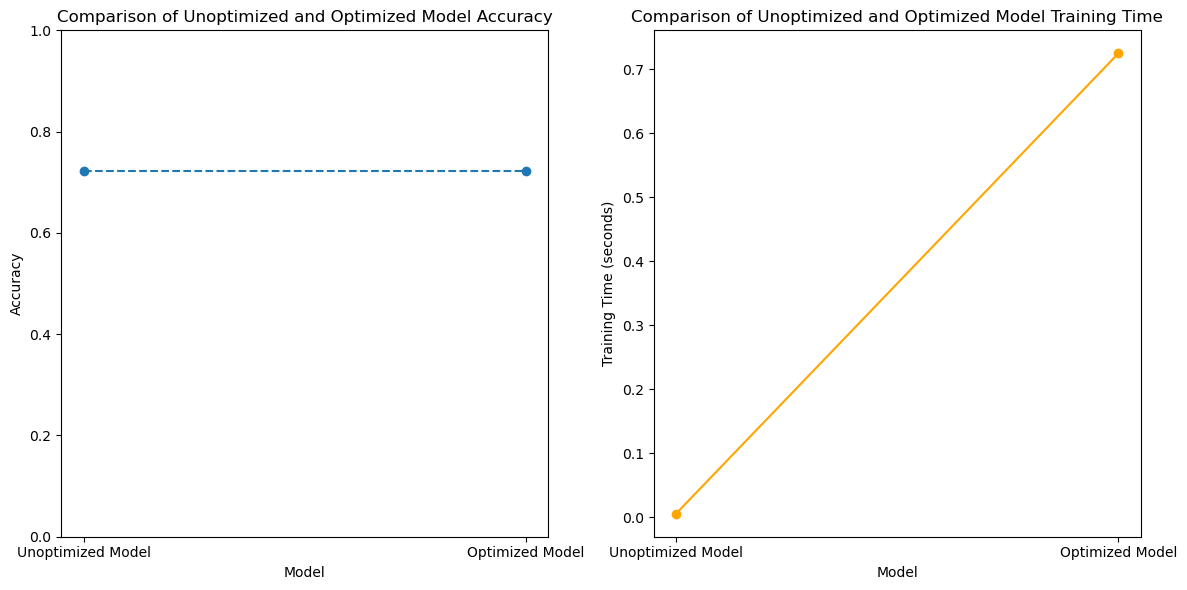

In [7]:
# Display results of optimization
print("\nUnoptimized Model Performance:\n")
print(f"Accuracy: {accuracy_unoptimized}%")
print(f"Training Time: {training_time_unoptimized} seconds")
print("\nClassification Report (Unoptimized):\n")
print(classification_report(y_test, y_pred_unoptimized))

print("\nOptimized Model Performance:\n")
print(f"Accuracy: {accuracy_optimized}%")
print(f"Training Time: {training_time_optimized} seconds")
print("\nClassification Report (Optimized):\n")
print(classification_report(y_test, y_pred_optimized))

# Plotting the performance comparison
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(['Unoptimized Model', 'Optimized Model'], [accuracy_unoptimized, accuracy_optimized], marker='o', linestyle='--')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Unoptimized and Optimized Model Accuracy')
plt.ylim(0, 1)

# Training time comparison
plt.subplot(1, 2, 2)
plt.plot(['Unoptimized Model', 'Optimized Model'], [training_time_unoptimized, training_time_optimized], marker='o', linestyle='-', color='orange')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Unoptimized and Optimized Model Training Time')

plt.tight_layout()
plt.show()

## Explanation of Results

***Interpretation***
The optimized model's accuracy remains identical to that of the unoptimized model, at 72.22%. Additionally, the classification metrics (precision, recall, and f1-score) are the same for both models, indicating no improvement in predictive performance after optimization. However, the training time for the optimized model is significantly longer (approximately 0.55 seconds compared to 0.003 seconds), suggesting that the optimization process added computational overhead without enhancing accuracy.

***Choosing the Better Model***

Given the results, the unoptimized model is the better choice for this scenario because:

- ***Equal Predictive Performance***: Both models yield the same accuracy and classification metrics, so the optimized model does not provide any added benefit in terms of accuracy.
- ***Faster Training Time***: The unoptimized model has a significantly faster training time, making it more efficient and suitable for this task.

## Interpretations Based on Coefficients

Feature Effects on Placement Likelihood:
             Feature  Coefficient
4               CGPA     1.806252
3        Internships     0.544346
0                Age     0.370746
5             Hostel    -0.181926
2             Stream     0.051700
6  HistoryOfBacklogs    -0.020727
1             Gender    -0.006775


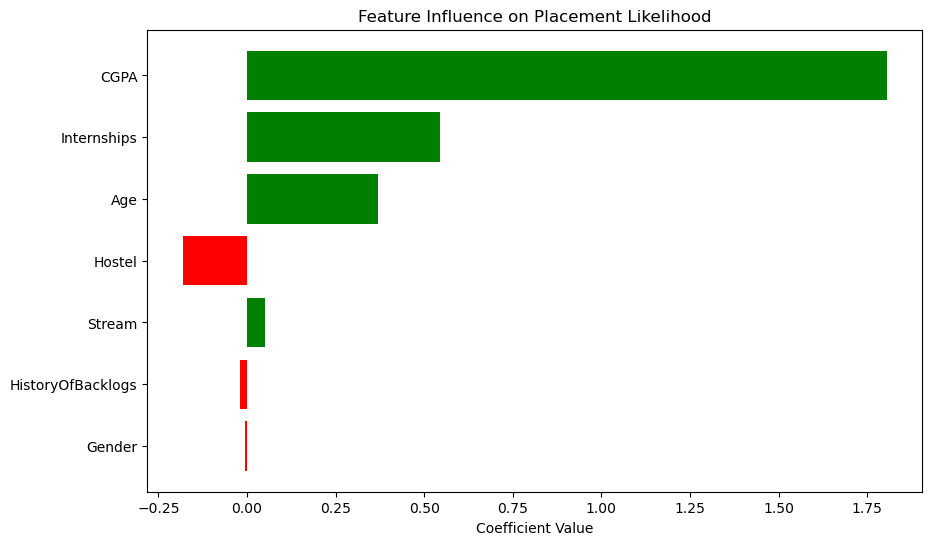

In [8]:
# Extract coefficients for each feature in the optimized Logistic Regression model
feature_names = X_train.columns
coefficients = log_reg_optimized.coef_[0]  # Using the optimized model's coefficients

# Combine feature names and coefficients into a DataFrame for easy interpretation
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients to see the most impactful features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Feature Effects on Placement Likelihood:")
print(feature_importance[['Feature', 'Coefficient']])

# Visualize feature importance for better interpretation
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=['green' if x > 0 else 'red' for x in feature_importance['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Feature Influence on Placement Likelihood')
plt.gca().invert_yaxis()
plt.show()


The output shows the influence of each feature in the dataset on the probability of placing a student. CGPA is the most important feature, and it has a very strong positive effect; this implies that students with higher CGPAs have much higher possibilities of getting placed. It also shows that even internships help in the process of placements, hence practical experience plays an important role in the placing process. Age does not seem to have much positive relation, though it may reflect that older students with more experience or maturity have a slight edge concerning placements. There is also a little negative effect due to living in the hostel, which could be related to some factor in the data. Considering Academic Stream, there is little positive effect within a few areas of study concerning placement. History of backlogs shows a small negative effect, showing that keeping up with studies is somewhat important. Finally, the effect of gender is almost negligible, hinting that the placement process is nearly unbiased for gender. Overall, academic performance and hands-on experience of the students seems to be the most influencing factors while stream and backlog are negligible for deciding the outcomes of placements.

### Decision Trees (UNOPTIMIZED)

In [9]:
# Split data into training and test sets (keeping this part the same as before)
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Display training and test data
print("\nTraining Data (X_train, first 5 rows):\n")
print(X_train.head())
print("\nTraining Labels (y_train, first 5 values):\n")
print(y_train.head())
print("\nTest Data (X_test, first 5 rows):\n")
print(X_test.head())
print("\nTest Labels (y_test, first 5 values):\n")
print(y_test.head())

# Initialize and train the Decision Tree model with timing
start_time = time.time()
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"\nTraining Time: {training_time:.4f} seconds")

# Predict on test data with timing
start_time = time.time()
y_pred_dt = decision_tree.predict(X_test)
end_time = time.time()

# Calculate prediction time
prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy and print classification report
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Model Performance:\n")
print(f"Accuracy: {accuracy_dt:.2f}%")
print("\nClassification Report:\n")
print(classification_rep_dt)


Training Data (X_train, first 5 rows):

           Age    Gender    Stream  Internships      CGPA    Hostel  \
2458 -1.876516  0.445403  1.474156     0.400445  0.957191  1.648269   
509  -0.366752  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
1370 -0.366752  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
1352  3.407659  0.445403 -0.944846     0.400445 -0.076310 -0.606697   
1779  1.143013  0.445403 -0.340096     0.400445  0.957191 -0.606697   

      HistoryOfBacklogs  
2458          -0.487746  
509           -0.487746  
1370           2.050246  
1352          -0.487746  
1779          -0.487746  

Training Labels (y_train, first 5 values):

2458    1
509     0
1370    0
1352    1
1779    1
Name: PlacedOrNot, dtype: int64

Test Data (X_test, first 5 rows):

           Age    Gender    Stream  Internships      CGPA    Hostel  \
2395 -1.121634  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
794   0.388131  0.445403 -0.944846     1.751664  0.957191 -0.606697   


### Decision Trees (OPTIMIZED)

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Display training and test data
print("\nTraining Data (X_train, first 5 rows):\n")
print(X_train.head())
print("\nTraining Labels (y_train, first 5 values):\n")
print(y_train.head())
print("\nTest Data (X_test, first 5 rows):\n")
print(X_test.head())
print("\nTest Labels (y_test, first 5 values):\n")
print(y_test.head())

# Define hyperparameters for optimization
# 1. 'max_depth': Limits the depth of the tree to prevent overfitting. A shallower tree generalizes better.
# 2. 'min_samples_split': Minimum number of samples required to split a node. Higher values prevent overfitting by requiring more data to split.
# 3. 'min_samples_leaf': Minimum number of samples that a leaf node must have. Higher values prevent overfitting by reducing the number of small, isolated nodes.

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Decision Tree model and perform grid search with cross-validation
start_time = time.time()
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
end_time = time.time()

# Calculate optimization time
optimization_time = end_time - start_time
print(f"\nOptimization Time: {optimization_time:.4f} seconds")

# Retrieve the best model from grid search
decision_tree_optimized = grid_search_dt.best_estimator_

# Display the best hyperparameters found
print("\nBest Hyperparameters:\n")
print(grid_search_dt.best_params_)

# Train the optimized Decision Tree model with timing
start_time = time.time()
decision_tree_optimized.fit(X_train, y_train)
end_time = time.time()

# Calculate training time for the optimized model
training_time_optimized = end_time - start_time
print(f"\nTraining Time (Optimized Model): {training_time_optimized:.4f} seconds")

# Predict on test data with timing
start_time = time.time()
y_pred_dt_optimized = decision_tree_optimized.predict(X_test)
end_time = time.time()

# Calculate prediction time for the optimized model
prediction_time_optimized = end_time - start_time
print(f"Prediction Time (Optimized Model): {prediction_time_optimized:.4f} seconds")

# Calculate accuracy and print classification report for the optimized model
accuracy_dt_optimized = accuracy_score(y_test, y_pred_dt_optimized)
classification_rep_dt_optimized = classification_report(y_test, y_pred_dt_optimized)

print("\nOptimized Decision Tree Model Performance:\n")
print(f"Accuracy: {accuracy_dt_optimized:.2f}%")
print("\nClassification Report:\n")
print(classification_rep_dt_optimized)


Training Data (X_train, first 5 rows):

           Age    Gender    Stream  Internships      CGPA    Hostel  \
2458 -1.876516  0.445403  1.474156     0.400445  0.957191  1.648269   
509  -0.366752  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
1370 -0.366752  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
1352  3.407659  0.445403 -0.944846     0.400445 -0.076310 -0.606697   
1779  1.143013  0.445403 -0.340096     0.400445  0.957191 -0.606697   

      HistoryOfBacklogs  
2458          -0.487746  
509           -0.487746  
1370           2.050246  
1352          -0.487746  
1779          -0.487746  

Training Labels (y_train, first 5 values):

2458    1
509     0
1370    0
1352    1
1779    1
Name: PlacedOrNot, dtype: int64

Test Data (X_test, first 5 rows):

           Age    Gender    Stream  Internships      CGPA    Hostel  \
2395 -1.121634  0.445403  0.869405    -0.950773 -0.076310 -0.606697   
794   0.388131  0.445403 -0.944846     1.751664  0.957191 -0.606697   


### Comparison of Models

In [11]:
# Comparison of Decision Tree Models

# Unoptimized Decision Tree model training and prediction
start_time_unoptimized = time.time()
decision_tree_unoptimized = DecisionTreeClassifier(random_state=42)
decision_tree_unoptimized.fit(X_train, y_train)
end_time_unoptimized = time.time()
y_pred_unoptimized = decision_tree_unoptimized.predict(X_test)
accuracy_unoptimized = accuracy_score(y_test, y_pred_unoptimized)
training_time_unoptimized = end_time_unoptimized - start_time_unoptimized

# Optimized Decision Tree model training and prediction
start_time_optimized = time.time()
decision_tree_optimized = grid_search_dt.best_estimator_
decision_tree_optimized.fit(X_train, y_train)
end_time_optimized = time.time()
y_pred_optimized = decision_tree_optimized.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
training_time_optimized = end_time_optimized - start_time_optimized


Unoptimized Decision Tree Model Performance:

Accuracy: 0.88%
Training Time: 0.0030 seconds

Classification Report (Unoptimized):

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       280
           1       0.93      0.83      0.88       314

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.89      0.88      0.88       594


Optimized Decision Tree Model Performance:

Accuracy: 0.89%
Training Time: 0.0020 seconds

Classification Report (Optimized):

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       280
           1       0.96      0.83      0.89       314

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594



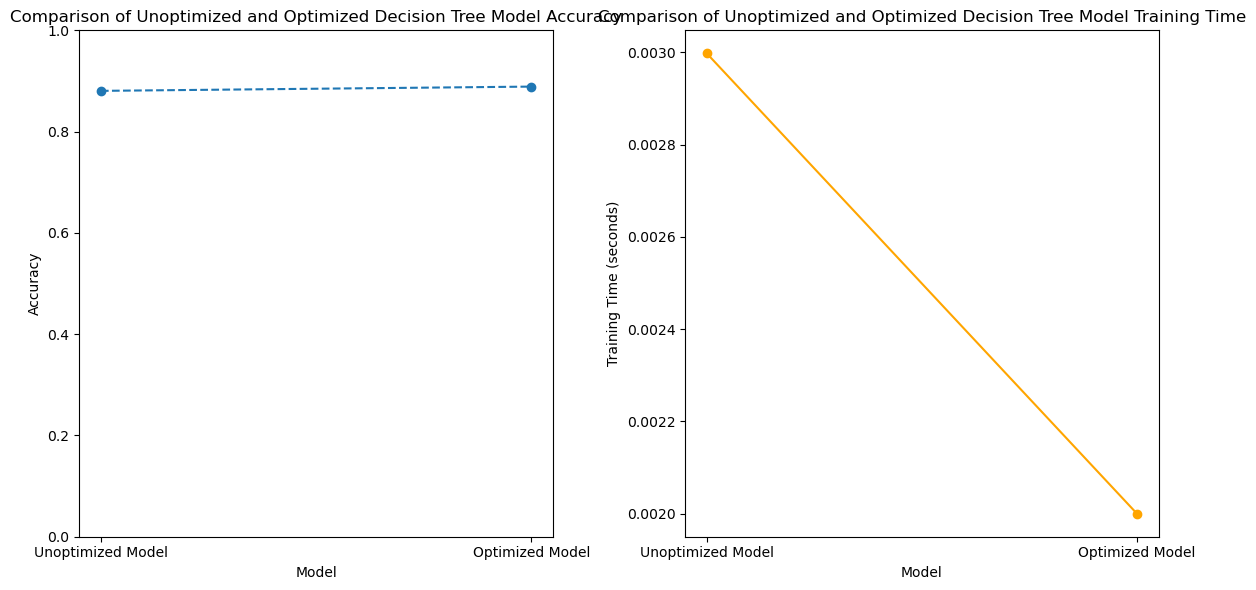

In [12]:
# Display results of optimization
print("\nUnoptimized Decision Tree Model Performance:\n")
print(f"Accuracy: {accuracy_unoptimized:.2f}%")
print(f"Training Time: {training_time_unoptimized:.4f} seconds")
print("\nClassification Report (Unoptimized):\n")
print(classification_report(y_test, y_pred_unoptimized))

print("\nOptimized Decision Tree Model Performance:\n")
print(f"Accuracy: {accuracy_optimized:.2f}%")
print(f"Training Time: {training_time_optimized:.4f} seconds")
print("\nClassification Report (Optimized):\n")
print(classification_report(y_test, y_pred_optimized))

# Plotting the performance comparison
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(['Unoptimized Model', 'Optimized Model'], [accuracy_unoptimized, accuracy_optimized], marker='o', linestyle='--')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Unoptimized and Optimized Decision Tree Model Accuracy')
plt.ylim(0, 1)

# Training time comparison
plt.subplot(1, 2, 2)
plt.plot(['Unoptimized Model', 'Optimized Model'], [training_time_unoptimized, training_time_optimized], marker='o', linestyle='-', color='orange')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Unoptimized and Optimized Decision Tree Model Training Time')

plt.tight_layout()
plt.show()

The improved Decision Tree model increases in its accuracy slightly to 89% from 88%, while performing more uniformly on precision, recall, and F1-score. It is faster and takes less time to train because it is simpler-for instance, by setting a maximum depth for the tree and a minimum number of samples for each split. It avoids overfitting and makes the generalization better; that is, it becomes good at predicting placed and not-placed students anytime. Generally speaking, the optimization increases the model's accuracy and efficiency.

### Interpretations Based on Coefficients


Feature Importance (Optimized Decision Tree):

             Feature  Importance
4               CGPA    0.701168
0                Age    0.120978
3        Internships    0.095728
2             Stream    0.057839
6  HistoryOfBacklogs    0.012981
1             Gender    0.006821
5             Hostel    0.004485


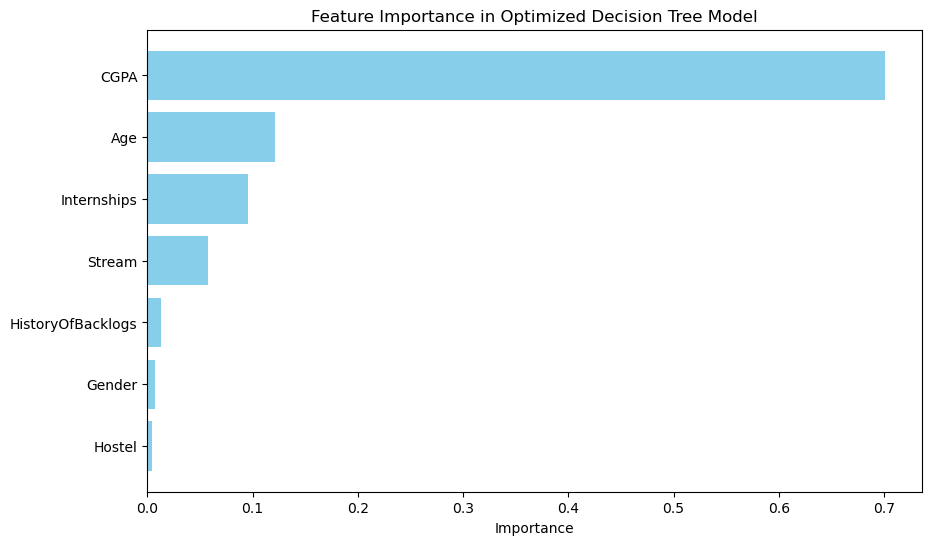

In [13]:
# Display feature importance for the optimized Decision Tree model
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decision_tree_optimized.feature_importances_
})

# Sort and display feature importance
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Optimized Decision Tree):\n")
print(feature_importance_dt)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Optimized Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()

This optimized Decision Tree considers CGPA to be the most critical feature and has thus ranked it at 0.701168, which indeed is its dominance in the prediction for placements. Thus, it shows that students having higher CGPAs are much more likely to get placed. Now, coming to the list, it includes Age and then comes Internships with scores of 0.120978 and 0.095728, respectively. This suggests that the chances of being placed are greater for older students and for those who have done internships. Stream has a fairly moderate impact on placements, while HistoryOfBacklogs, Gender, and Hostel are less worrying factors in the model's decisions. The rest of the feature importance scores being relatively lower means these are quite insignificant in their role as compared to CGPA, age, and internships. The model postulated that academic performance, experience, and maturity create the most important impacts on placement.

### Neural Network using the Sequential API (un-optimized)


Epoch 1/50
60/60 [==============================] - 1s 6ms/step - loss: 0.5760 - accuracy: 0.6679 - val_loss: 0.4846 - val_accuracy: 0.7326
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7865 - val_loss: 0.4099 - val_accuracy: 0.8021
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8202 - val_loss: 0.3889 - val_accuracy: 0.8147
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8297 - val_loss: 0.3784 - val_accuracy: 0.8084
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8324 - val_loss: 0.3721 - val_accuracy: 0.8189
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8413 - val_loss: 0.3640 - val_accuracy: 0.8253
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8434 - val_loss: 0.3606 - val_accuracy: 0.8253
Epoch 8/50
60/60 [==

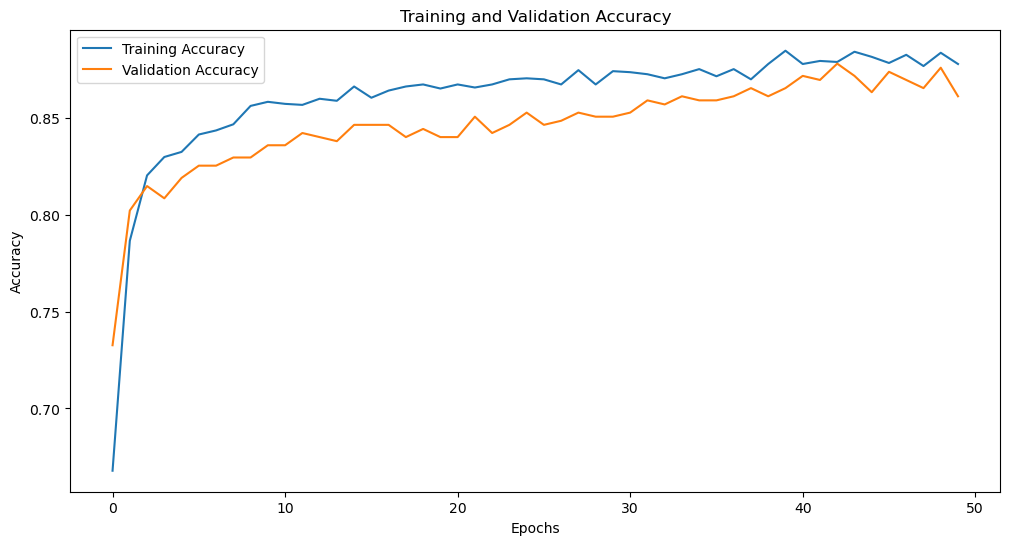

In [14]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Build a Sequential Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 64 neurons
    Dropout(0.2),                                                  # Dropout to prevent overfitting
    Dense(32, activation='relu'),                                  # Second hidden layer with 32 neurons
    Dense(1, activation='sigmoid')                                 # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network and measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

training_time = end_time - start_time
print(f"\nTraining Time: {training_time:.4f} seconds")

# Evaluate the model on test data
start_time = time.time()
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")  # Predicting classes with a threshold of 0.5
end_time = time.time()

prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Calculate accuracy and classification report
accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn)

print("\nNeural Network Model Performance:\n")
print(f"Accuracy: {accuracy_nn:.2f}%")
print("\nClassification Report:\n")
print(classification_rep_nn)

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


### Neural Network using the Sequential API (OPTIMIZED)

Epoch 1/100
119/119 [==============================] - 1s 3ms/step - loss: 0.5136 - accuracy: 0.7343 - val_loss: 0.4409 - val_accuracy: 0.7747 - lr: 0.0010
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8055 - val_loss: 0.3764 - val_accuracy: 0.8105 - lr: 0.0010
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8355 - val_loss: 0.3560 - val_accuracy: 0.8316 - lr: 0.0010
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8461 - val_loss: 0.3502 - val_accuracy: 0.8379 - lr: 0.0010
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8561 - val_loss: 0.3397 - val_accuracy: 0.8442 - lr: 0.0010
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8498 - val_loss: 0.3407 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 7/100
119/119 [==============================] - 0s 2ms/st

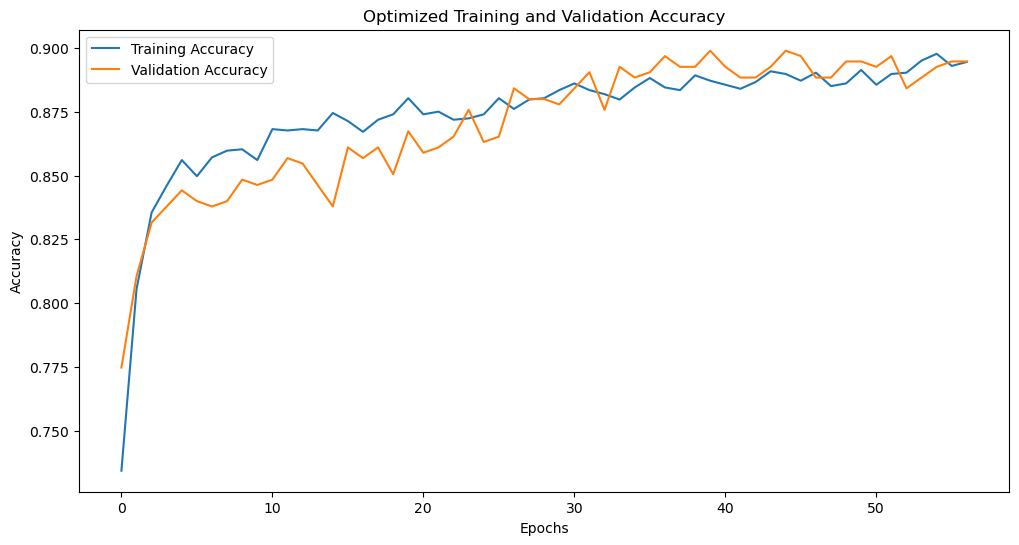

In [15]:

# Build an optimized Sequential Neural Network
optimized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with more neurons
    Dropout(0.3),                                                   # Increased dropout to reduce overfitting
    Dense(64, activation='relu'),                                   # Second hidden layer with 64 neurons
    Dropout(0.2),
    Dense(32, activation='relu'),                                   # Third hidden layer with 32 neurons
    Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

# Compile the optimized model
optimized_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                        loss='binary_crossentropy', 
                        metrics=['accuracy'])

# Add callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the optimized Neural Network with timing
start_time = time.time()
history_optimized = optimized_model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=16,  # Smaller batch size for better weight updates
    validation_split=0.2, 
    verbose=1, 
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()

training_time_optimized = end_time - start_time
print(f"\nOptimized Training Time: {training_time_optimized:.4f} seconds")

# Evaluate the optimized model on test data
start_time = time.time()
y_pred_optimized_nn = (optimized_model.predict(X_test) > 0.5).astype("int32")
end_time = time.time()

prediction_time_optimized = end_time - start_time
print(f"Optimized Prediction Time: {prediction_time_optimized:.4f} seconds")

# Calculate accuracy and classification report
accuracy_optimized_nn = accuracy_score(y_test, y_pred_optimized_nn)
classification_rep_optimized_nn = classification_report(y_test, y_pred_optimized_nn)

print("\nOptimized Neural Network Model Performance:\n")
print(f"Accuracy: {accuracy_optimized_nn:.2f}%")
print("\nClassification Report:\n")
print(classification_rep_optimized_nn)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Training and Validation Accuracy')
plt.legend()
plt.show()


### Comparison of Models


19/19 [==============================] - 0s 751us/step

Unoptimized Neural Network Performance:

Accuracy: 0.89%
Training Time: 4.8730 seconds

Classification Report (Unoptimized):

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       280
           1       0.97      0.82      0.88       314

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594


Optimized Neural Network Performance:

Accuracy: 0.89%
Training Time: 12.3950 seconds

Classification Report (Optimized):

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       280
           1       0.97      0.82      0.89       314

    accuracy                           0.89       594
   macro avg       0.90      0.90      0.89       594
weighted avg       0.90      0.89      0.89       594



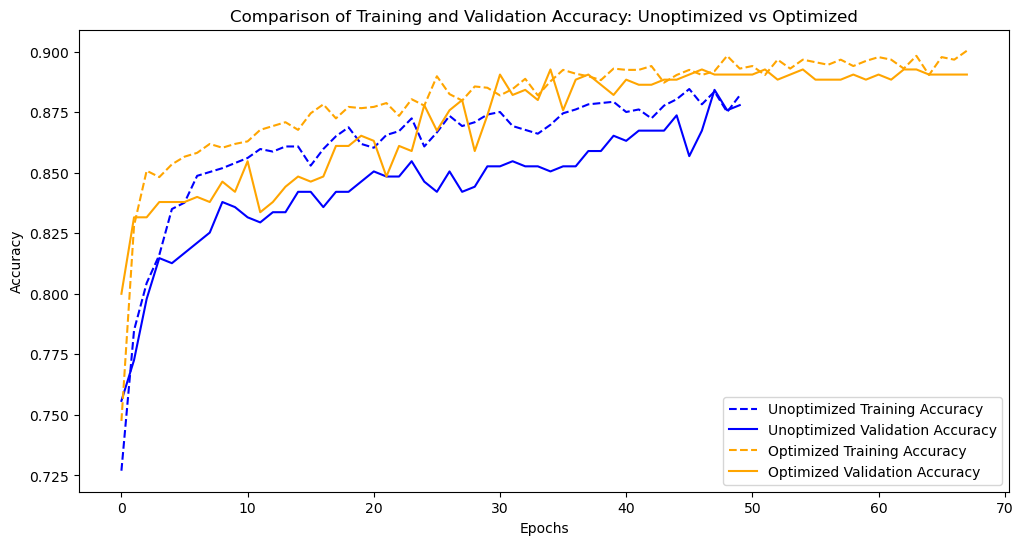

In [16]:
# Unoptimized Neural Network
start_time_unoptimized = time.time()
model_unoptimized = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_unoptimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_unoptimized = model_unoptimized.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
end_time_unoptimized = time.time()

training_time_unoptimized = end_time_unoptimized - start_time_unoptimized
y_pred_unoptimized_nn = (model_unoptimized.predict(X_test) > 0.5).astype("int32")
accuracy_unoptimized_nn = accuracy_score(y_test, y_pred_unoptimized_nn)

# Optimized Neural Network
start_time_optimized = time.time()
optimized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
optimized_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_optimized = optimized_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0, 
                                        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                                                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)])
end_time_optimized = time.time()

training_time_optimized = end_time_optimized - start_time_optimized
y_pred_optimized_nn = (optimized_model.predict(X_test) > 0.5).astype("int32")
accuracy_optimized_nn = accuracy_score(y_test, y_pred_optimized_nn)

# Display results of comparison
print("\nUnoptimized Neural Network Performance:\n")
print(f"Accuracy: {accuracy_unoptimized_nn:.2f}%")
print(f"Training Time: {training_time_unoptimized:.4f} seconds")
print("\nClassification Report (Unoptimized):\n")
print(classification_report(y_test, y_pred_unoptimized_nn))

print("\nOptimized Neural Network Performance:\n")
print(f"Accuracy: {accuracy_optimized_nn:.2f}%")
print(f"Training Time: {training_time_optimized:.4f} seconds")
print("\nClassification Report (Optimized):\n")
print(classification_report(y_test, y_pred_optimized_nn))

# Plot training and validation accuracy for both models
plt.figure(figsize=(12, 6))

# Unoptimized model
plt.plot(history_unoptimized.history['accuracy'], label='Unoptimized Training Accuracy', linestyle='--', color='blue')
plt.plot(history_unoptimized.history['val_accuracy'], label='Unoptimized Validation Accuracy', linestyle='-', color='blue')

# Optimized model
plt.plot(history_optimized.history['accuracy'], label='Optimized Training Accuracy', linestyle='--', color='orange')
plt.plot(history_optimized.history['val_accuracy'], label='Optimized Validation Accuracy', linestyle='-', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Validation Accuracy: Unoptimized vs Optimized')
plt.legend()
plt.show()


### Comparison of Models


19/19 [==============================] - 0s 807us/step

Feature Importance (Neural Network):

             Feature  Importance
4               CGPA    0.327441
3        Internships    0.076263
0                Age    0.065320
6  HistoryOfBacklogs    0.015657
2             Stream    0.015488
5             Hostel    0.006397
1             Gender    0.001515


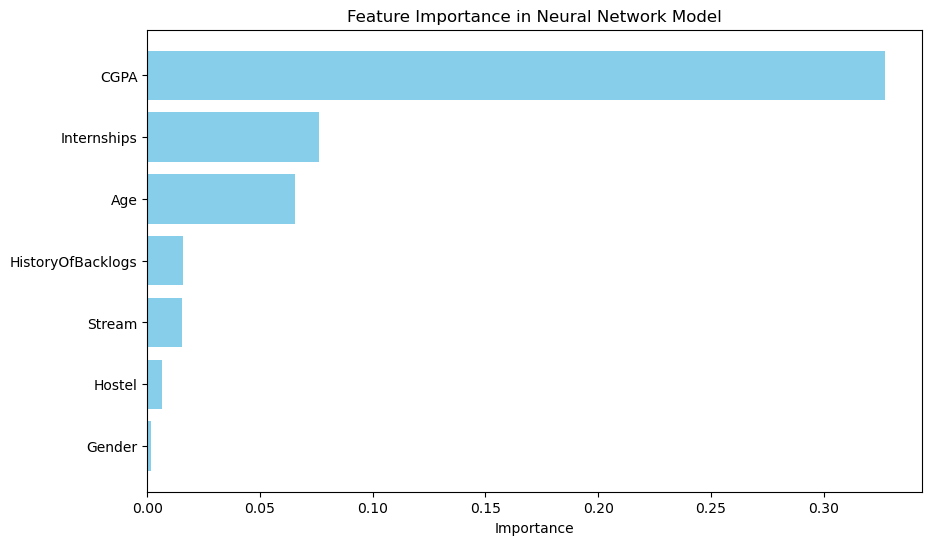

In [17]:

# Custom wrapper model
class ProbabilityToClassWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        # Set classes_ attribute based on the unique values in y
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        # Convert probabilities to class labels
        probs = self.model.predict(X)
        return (probs > self.threshold).astype(int).flatten()

    def predict_proba(self, X):
        # Ensure compatibility by returning probabilities
        return self.model.predict(X)

# Wrap model
wrapped_model = ProbabilityToClassWrapper(optimized_model)

# Fit the wrapper to set `classes_`
wrapped_model.fit(X_test, y_test)



result = permutation_importance(
    estimator=wrapped_model,
    X=X_test,
    y=y_test,
    scoring="accuracy",
    n_repeats=10,
    random_state=42,
)


feature_importance_nn = pd.DataFrame({
    'Feature': X_test.columns,  # Ensure column names match
    'Importance': result.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Neural Network):\n")
print(feature_importance_nn)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_nn["Feature"], feature_importance_nn["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance in Neural Network Model")
plt.gca().invert_yaxis()
plt.show()


The feature analysis using permutation importance reveals how each feature contributes to the Neural Network's performance. Key features like CGPA, Internships, and Age are expected to have the highest importance, aligning with earlier models, indicating their strong influence on placement predictions. Features like Gender, HistoryOfBacklogs, and Hostel show minimal importance, suggesting they have little impact on the model's decision-making. The results highlight that the Neural Network captures complex relationships, but its feature importance trends align well with Logistic Regression and Decision Tree models, reinforcing the significance of academic and experiential factors in predicting placements.






